# Least Squares {#sec-leastsquares}

## Overview

Linear regression is a simple statistical model where it relates the value of one variable $Y$, also known as the response
variable, with the value of a number of predictor variables $\mathbf{X}$. In order to predict the weights associated with
the assumed functional relationship, linear in this case, one can use the  <a href="https://en.wikipedia.org/wiki/Least_squares">least squares</a>
approach and n particular linear least squares. 

For a model of the form 

$$y = w_0 + w_1x_1+ \dots + w_{m}x_m + \epsilon \tag{1}$$

linear least squares minimize the sum of the squared residuals i.e. it minimizes a quantity of the form


$$J = \sum_i \left(y_i - \hat{y}_i\right)^2$$



## Least squares

Least squares is a standard approach to use when doing regression analysis. 
In this scenario,  we want to approximate the solution of overdetermined systems [1].

----
**Overdetermined system**

In linear algebra, a system of equation is called overdetermined if it involves more equations to solve for than unknowns.

----


We do so by minimizing the sum of the squares of the residuals (see below). 
It can be shown that when the residuals follow the normal distribution, the 
ordinary least squares estimate coincides with the maximum likelihood estimate. 


----
**Residual and sum of the squares of the residuals**


Approximating a function always involves an error. For example let's say we want to approximate the value of a  function $f$ at point $x_0$. The exact form of $f$ is unknown. Therefore, we use some sort of an assumed approximation of $f$, say $\hat{f}$. We define the residual to be given by:


$$e_{x_0} = \hat{f}(x_0) - y$$

where $y$ is the observed value of $f$ at $x_0$. The above may seem somehow counter intuitive as it involves the value of $f$ at $x_0$ i.e. $y$. However, for the applications we are interested in, we typically have data in the form $(x_i, y_i)$ and we are interested in a model that approximates the data generator. This type of data we call it labeled data.

Now assume we have a collection of points to estimate $f$ and also assume that we know the values of it at the collected points. Then the sum of the squares is simple

$$SSE = \sum_i (\hat{f}(x_i) - y_i)^2$$


----


In order to have a better understanding of the method of leats squares, we will
assume that the data availbale to us is generated via the following function where $x \in [0, 1]$

$$f(x) = sin(2\pi x) + \epsilon$$

where $\epsilon$ will be some normally distributed noise term. 
Further, we will assume the follwing linear model in order to fit into the generated data.

$$\hat{y} = w_0 + w_1 x$$

We know that this will not necessarily be a good fit as the data generating source 
is a non-linear function whilst we try to fit a linear model. In fact, for each observation, we commit the following error

$$e_i = \hat{y}_i - y_i$$

The total error is then given by 

$$e_{total} = \sum_i e_i$$

When using least squares, our aim is to minimize the, average, error over the data set. Using the expression above is not very useful;
the positive and negative terms can cancel each other.  A more useful error description is the _SSE_ error function we saw above.
Thus, when using least squares, we want to minimize the _SSE_ expression. 
From calculus we know that the extremum points (maximum or minimum) are located at the end 
of the inteval the function in hand is defined and at the points where the first derivative of the function is zero. 
We want to take the derivative however with respect to the unknown coefficients. In this respect we have

$$\frac{\partial SSE}{\partial w_0} = 2 \sum_i (\hat{f}(x_i) - y_i) = 0$$
$$\frac{\partial SSE}{\partial w_1} = 2 \sum_i (\hat{f}(x_i) - y_i)x_i = 0$$

The resilting expressions can be quite involved.  Linear algebra can be a great deal of help to us in order to simplify things, see also [3]. 

**Theorem**

Let  the $n \times m$ matrix  and the $\mathbf{b} \in R^n$ vector. The following are equivalent

- The system of equations 

$$A \mathbf{w} = \mathbf{b}$$

has a unique least-squares solution given by

$$\hat{\mathbf{w}} = (A^TA)^{-1}A\mathbf{b}$$

- The columns of $A$ are linearly independent 
- The matrix $A^TA$ is invertible

Hence, according to the theorem, the least squares solution is unique, provided that the  matrix $A^TA$ is invertible which means that $det(A^TA)$ should not be equal to zero. 
This is always possible if the matrix $A$ representing the data set, has full rank with respect to the columns. Specifically, if $rank(A) = m$, 
then the features are linearly independent and thus the matrix $A^TA$ has no columns or rows that 
are proportional to others (something that would lead to $det(A^TA)=0$). 
Another viewpoint about uniqueness is provided by the fact that the loss function _SSE_ is a quadratic function thus it should have a global minimum point. 

----

**Normal equations**

The equations implied by the solution above i.e.

$$A^TA\mathbf{\hat{w}} =  A^T\mathbf{b}$$

are known as the <a href="https://mathworld.wolfram.com/NormalEquation.html">normal equations</a>.

----

Let's try to materialize all the above using Python to set up a small numerical example.

## Python code

In this section, we will use Python to program linear least squares. Using the 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate $N=50$ points.

In [3]:
# generate 50 points in the interval [0, 1]
N = 50
x = np.linspace(0.0, 1.0, N)

In [4]:
# We add some noise in the generated observations
mu, sigma = 0, 0.1

# compute the function
y = np.sin(2.0*np.pi*x) + np.random.normal(mu, sigma, len(x))

Plot the data to get an idea how it looks like.

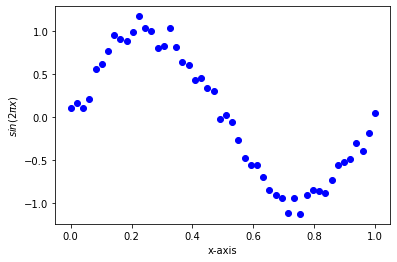

In [5]:
plt.plot(x, y, 'bo')
plt.xlabel("x-axis")
plt.ylabel("$sin(2\pi x)$")
plt.show()

Stack the data in a matrix form to pass it in <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html">numpy.linalg.lstsq</a>

In [7]:
A = np.vstack([x, np.ones(len(x))]).T

In [8]:
c_1, c_0 = np.linalg.lstsq(np.array(A), y, rcond=None)[0]

In [9]:
print(f"c_0={c_0}")
print(f"c_1={c_1}")

c_0=0.9057406822337607
c_1=-1.7893338972841375


Let's create a polynomial from these parameters and plot. We can use the 

In [14]:
best_fit_line = np.polynomial.Polynomial([c_0, c_1])

In [17]:
print(best_fit_line)

0.9057406822337607 - 1.7893338972841375·x¹


In [15]:
y_hat_vals = best_fit_line(x)

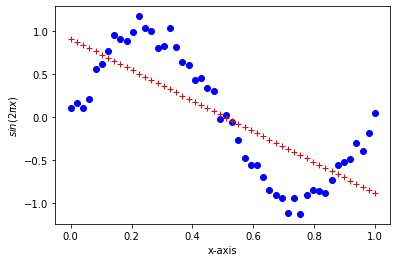

In [16]:
plt.plot(x, y, 'bo')
plt.plot(x, y_hat_vals, 'r+')
plt.xlabel("x-axis")
plt.ylabel("$sin(2\pi x)$")
plt.show()

## Summary

The present section introduced linear least squares and how to use it in order to fit a line in a data set. 
In particular, we assumed that the data set is generated by 

$$f(x) = sin(2\pi x) + \epsilon$$

however in practice we won't know this. The ordinary least squares, is equivalient to the maximum likelihood estimate when $\epsilon$ is normally distributed.
Finally, we saw the conditions required in order to have a unique least squares solution.



One thing that this chapter did not touch is the quality of the estimated solution. We will look into how to measure the goodness of fit
when we discuss linear regression.


Least squares are not robust against outliers which can have a large effect on the estimated coefficients and their standard errors.

## References


1. <a href="https://en.wikipedia.org/wiki/Least_squares">Least squares</a>
2. <a href="https://mathworld.wolfram.com/LeastSquaresFitting.html">Least Squares Fitting</a>
3. <a href="https://textbooks.math.gatech.edu/ila/least-squares.html">The Method of Least Squares</a>